## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Reading the data

This dataset is having data of customers who buys clothes online. The store offers in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want. The company is trying to decide whether to focus their efforts on their mobile app experience or their website.

In [2]:
data=pd.read_csv("../input/ecommercecustomers/Ecommerce Customers")

## Exploratory Data Analysis

## Understanding the data

In [3]:
data.shape

(500, 8)

In [4]:
data.head(5)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
data.tail(5)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510
499,hannahwilson@davidson.com,49791 Rachel Heights Apt. 898\nEast Drewboroug...,DarkMagenta,33.715981,12.418808,35.771016,2.735160,497.778642


In [6]:
# Checking the datatypes of variables
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


The columns Email, Address and Avatar has unique values in almost every row and does not impact the target variable, Yearly Amount Spent. So we are going to drop these columns

In [7]:
data.drop(columns=['Email','Address','Avatar'],axis=1,inplace=True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Avg. Session Length   500 non-null    float64
 1   Time on App           500 non-null    float64
 2   Time on Website       500 non-null    float64
 3   Length of Membership  500 non-null    float64
 4   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5)
memory usage: 19.7 KB


## Checking for Missing Values

In [9]:
# Checking for missing values
data.isnull().sum()

Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

### Observations

* There are no categorical variables in the dataset
* There are 4 continuous independent variables, Avg.Session Length, Time on App, Time on Website and Length of Membership.
* The target variable Yearly Amount Spent is also a continuous variable.
* There are no missing values in any of the columns of the dataset.

## Outlier Detection

Text(0.5, 1.0, 'Avg. Session Length')

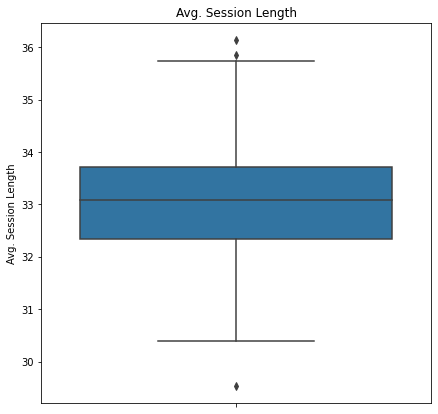

In [10]:
# Boxplot of Avg. Session Length

fig = plt.figure(figsize=(7,7))
sns.boxplot(y=data['Avg. Session Length'])
plt.title('Avg. Session Length')

Text(0.5, 1.0, 'Time on App')

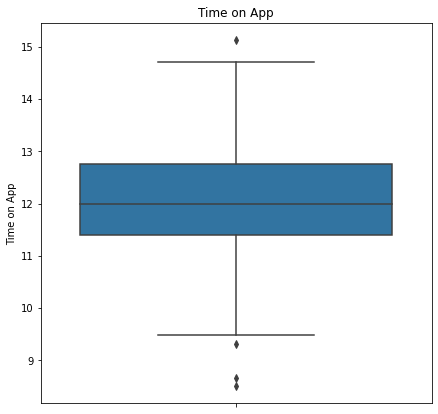

In [11]:
# Boxplot of Time on App

fig = plt.figure(figsize=(7,7))
sns.boxplot(y=data['Time on App'])
plt.title('Time on App')

Text(0.5, 1.0, 'Time on Website')

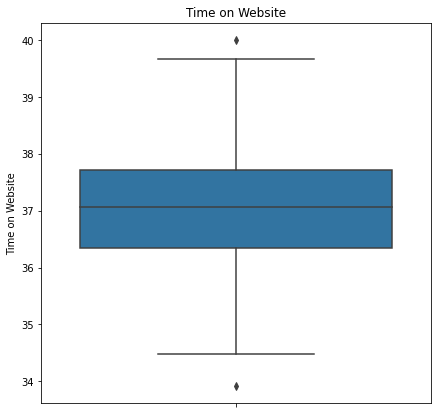

In [12]:
# Boxplot of Time on Website

fig = plt.figure(figsize=(7,7))
sns.boxplot(y=data['Time on Website'])
plt.title('Time on Website')

Text(0.5, 1.0, 'Length of Membership')

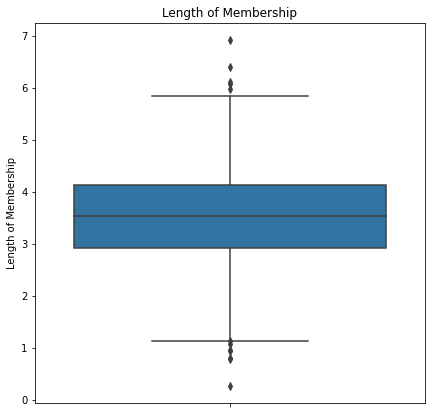

In [13]:
# Boxplot of Length of Membership

fig = plt.figure(figsize=(7,7))
sns.boxplot(y=data['Length of Membership'])
plt.title('Length of Membership')

As the number of outliers are very few, we remove them form the dataset

In [14]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
data = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]

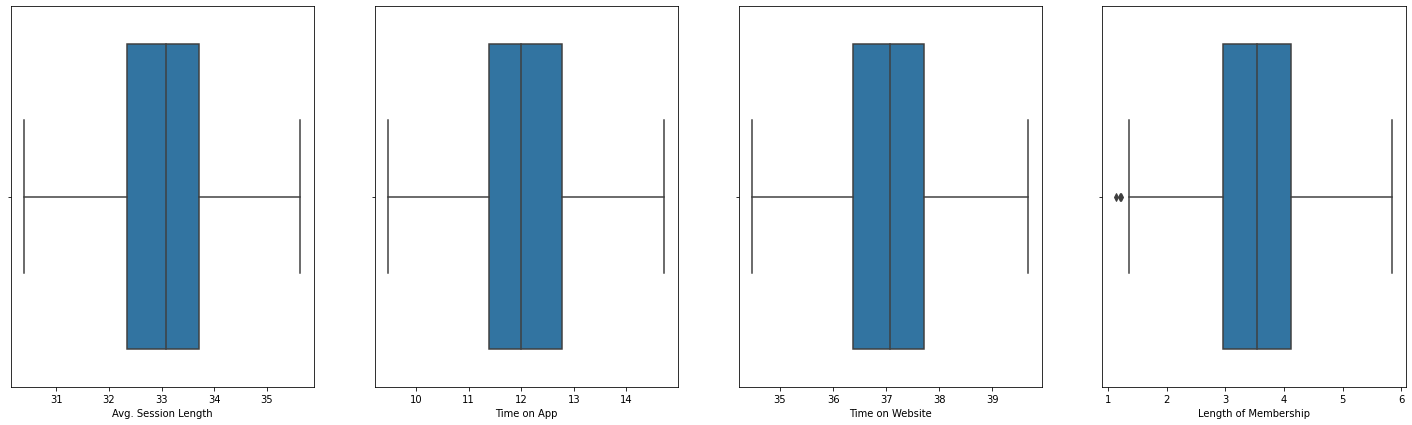

In [15]:
# After removing the outliers

fig = plt.figure(figsize=(25,7))
plt.subplot(1,4,1)
sns.boxplot(data['Avg. Session Length'])
plt.subplot(1,4,2)
sns.boxplot(data['Time on App'])
plt.subplot(1,4,3)
sns.boxplot(data['Time on Website'])
plt.subplot(1,4,4)
sns.boxplot(data['Length of Membership'])
plt.show()

## Checking for Normality

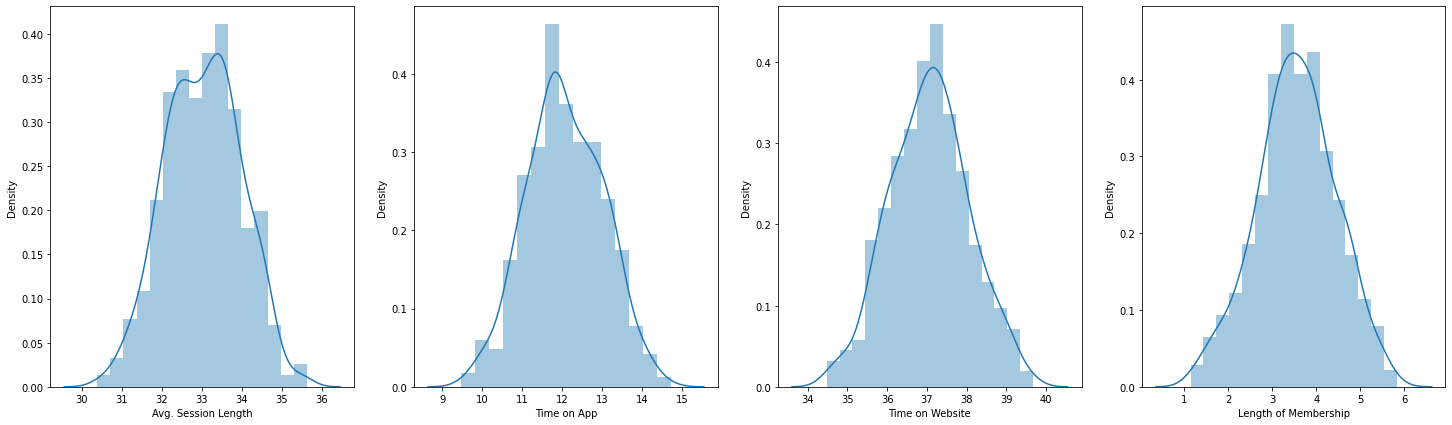

In [16]:
# Checking the distributions of independent variables

fig = plt.figure(figsize=(25,7))
plt.subplot(1,4,1)
sns.distplot(data['Avg. Session Length'])
plt.subplot(1,4,2)
sns.distplot(data['Time on App'])
plt.subplot(1,4,3)
sns.distplot(data['Time on Website'])
plt.subplot(1,4,4)
sns.distplot(data['Length of Membership'])
plt.show()

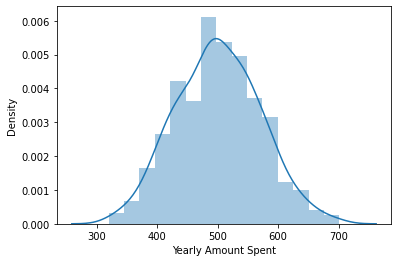

In [17]:
## Checking for the normality assumption of target variable

sns.distplot(data["Yearly Amount Spent"])
plt.show()

From the above plots we can say that all our variables are normally distributed and therfore satisfy the normaity assumption.

## Multicollinearity

To determine the linearity, we start by calculating the correlation between the independent variables.

<AxesSubplot:>

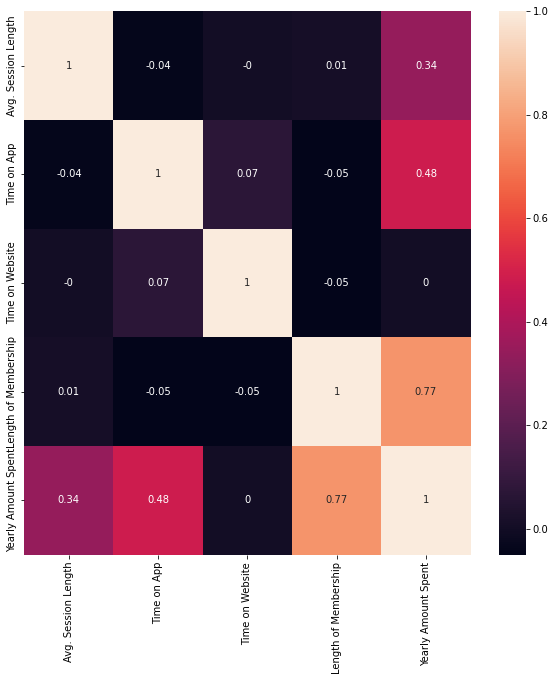

In [18]:
# First calculating the correlation coefficients of the independent variables
# and rounding it off to 2 digits

correlation_matrix=np.round(data.corr(), 2)

# Plotting the correlation matrix

fig = plt.figure(figsize=(10,10))
sns.heatmap(data=correlation_matrix, annot=True)

The correlation matrix shows that the target variable Yearly Amount Spent is highly correlated 
to the independent variable Length of Membership.

So, there is no linearity between any of the independent variables and so the data follows the assumption of no multicollinearity.

## Data Partition into Training and Testing

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data.drop(['Yearly Amount Spent'],axis=1),
                                                   data['Yearly Amount Spent'],
                                                   test_size=0.25,
                                                   random_state=0)

x_train.shape, x_test.shape

((357, 4), (119, 4))

## Model Construction and Validation

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score

In [21]:
linear_reg = LinearRegression()
linear_reg.fit(x_train,y_train)

y_linear_pred = linear_reg.predict(x_test)

In [22]:
print('Mean absolute error: ',mean_absolute_error(y_test,y_linear_pred))
print()
print('Root mean squared error: ', np.sqrt(mean_absolute_error(y_test,y_linear_pred)))
print()
print('R2 score: ',r2_score(y_test,y_linear_pred))

Mean absolute error:  8.915078358001631

Root mean squared error:  2.9858128471157785

R2 score:  0.969591081117196


So, the accuracy of the predicted model is btained to be 96.95%.

As the amount of the data in the dataset is not very large, we use K-fold Cross Validation Technique to make sure that the predicted model is the best choice.

In [23]:
# Using k=10 in K-fold Cross Validation
cvs = cross_val_score(linear_reg,x_train,y_train,cv=10)

print('Accuracy: {:.2f} %'.format(cvs.mean()*100))
print('Standard Deviation {:.2f} %'.format(cvs.std()*100))

Accuracy: 98.03 %
Standard Deviation 0.64 %


This shows that the standard deviation is very low and so the predicted linear regression model is the best choice for the dataset and the accuracy of the model is between 97.39% and 98.67%.

## Interpretation of the model

In [24]:
# The coefficients and intercept of the regression model are
print("Coefficients : ", linear_reg.coef_)
print("Intercept : ",linear_reg.intercept_)

Coefficients :  [26.03336703 39.20012732  0.23042303 61.28109167]
Intercept :  -1059.5410514245957


In [25]:
#Converting it into a dataframe
pd.DataFrame(data=linear_reg.coef_, index=['Avg. Session Length','Time on App','Time on Website','Length of Membership'], columns=['Coefficient'])

,Coefficient
Avg. Session Length,26.033367
Time on App,39.200127
Time on Website,0.230423
Length of Membership,61.281092


## Conclusion

The predicted model is found to be 98% accurate.

The inferences that can be drawn from the linear regression model are,

1) Increase of one unit in Avg. Session Length results in an increase of $ 26.033367 of Yearly Amount Spent.

2) Increase of one unit in Time on App results in an increase of $ 39.200127 of Yearly Amount Spent.

3) Increase of one unit in Time on Website results in an increase of $ 0.230423 of Yearly Amount Spent.

4) Increase of one unit in Length of Membership results in an increase of $ 61.281092 of Yearly Amount Spent.

So, the company needs to focus mostly on the strategies to motivate the customers to take longer terms of membership in order to increase the revenue. It should also focus on app rather than on website as the app is generating more revenue for the company. 